(60, 128, 128)
(60, 128, 128)


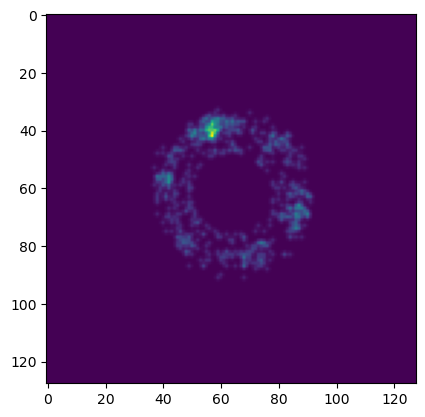

In [1]:
# training data
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# load training data
training_data = np.load('training_data.npz')
intensity = training_data['intensity']
phi = training_data['phi']
print(intensity.shape)

def mask_and_blur_images(array):
    '''masks signal inside radius of 14 and outside radius of 30 and adds gaussian blur for all intensity data'''
    for i in range(0,60):
        x,y = np.meshgrid(np.arange(128), np.arange(128))
        radius = np.sqrt((x-64)**2 + (y-62)**2)
        mask1 = radius <= 14
        mask2 = radius >= 30
        masked_data = array[i].copy()
        masked_data[mask1] = 0
        masked_data2 = masked_data.copy()
        masked_data2[mask2] = 0
        # masked_data_norm = (masked_data - np.min(masked_data) / (np.max(masked_data) - np.min(masked_data)))
        blurred_data = gaussian_filter(masked_data2, sigma=.65)
        array[i] = blurred_data
    return array

x=mask_and_blur_images(intensity)
plt.imshow(x[0])

In [3]:
def normalize_intensity(data):
    normalized_data = np.zeros_like(data, dtype=np.float32)
    for i in range(data.shape[0]):
        layer = data[i]
        min_val = np.min(layer)
        max_val = np.max(layer)
        normalized_layer = (layer - min_val) / (max_val - min_val)
        normalized_data[i] = normalized_layer
    return normalized_data


(60, 128, 128)


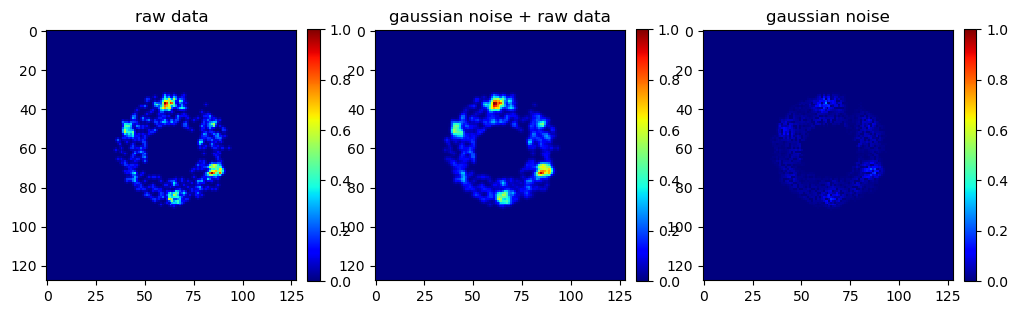

(60, 128, 128)


In [7]:
# Gaussian noise

# load training data
training_data = np.load('training_data.npz')
intensity = training_data['intensity']
# intensity = normalize_intensity(intensity) # normalize intensity data
phi = training_data['phi']
print(intensity.shape)


def add_gaussian_noise(array, mean=0, stddev=1):
    '''Adds masked, gaussian noise to signal'''
    signal_w_gaussian = array + np.random.normal(mean, stddev, array.shape)
    signal_w_gaussian = np.clip(signal_w_gaussian, 0, np.max(signal_w_gaussian))
    signal_w_gaussian = mask_and_blur_images(signal_w_gaussian)
    return signal_w_gaussian

# gauss_train_data = add_gaussian_noise(intensity)

def plot_gaussian_noise(array, idx):
    '''plots raw, gaussian+raw, and gaussian noise data'''
    mask_raw = mask_and_blur_images(array) # masks the raw data
    add_gauss = add_gaussian_noise(mask_raw) # adds masked, gaussian noise to masked, raw data

    #normalize
    norm_raw = normalize_intensity(mask_raw) # normalizes masked, raw data
    norm_gauss = normalize_intensity(add_gauss) # normalize masked, raw+gaussian data
    max_int = np.max(norm_raw[idx])

    fig, axs = plt.subplots(1, 3, figsize=(12,6))
    
    im0 = axs[0].imshow(norm_raw[idx], cmap='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[0].set_title('raw data')
    fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

    im1 = axs[1].imshow(norm_gauss[idx], cmap ='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[1].set_title('gaussian noise + raw data')
    fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

    noise = norm_gauss[idx]-norm_raw[idx]
    im2 = axs[2].imshow(noise, cmap ='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[2].set_title("gaussian noise")
    fig.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)
    return plt.show()

plot_gaussian_noise(intensity, 10)



(60, 128, 128)


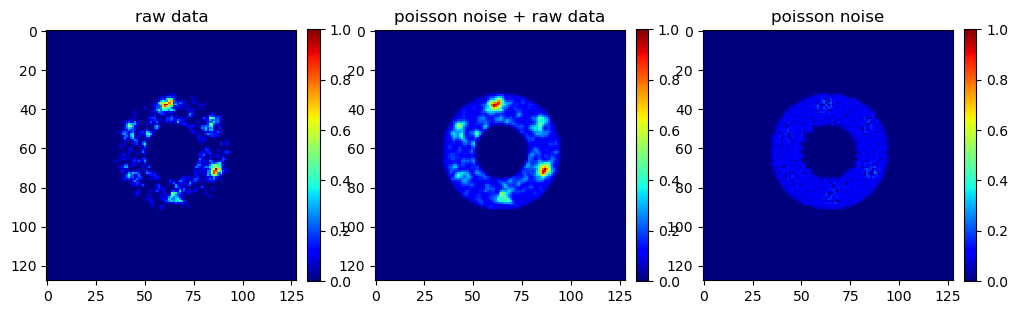

In [5]:
# Poisson noise

# load training data
training_data = np.load('training_data.npz')
intensity = training_data['intensity']
phi = training_data['phi']
print(intensity.shape)

def add_poisson_noise(array, lam=50):
    '''add poisson noise to signal'''
    signal_w_poisson = array + np.random.poisson(lam, size=array.shape)
    signal_w_poisson = np.clip(signal_w_poisson, 0, np.max(signal_w_poisson))
    signal_w_poisson = mask_and_blur_images(signal_w_poisson)
    return signal_w_poisson

def plot_poisson_noise(array, idx):
    '''plots raw, poisson+raw, and poisson noise data'''
    mask_raw = mask_and_blur_images(array) # masks the raw data
    add_poisson = add_poisson_noise(mask_raw) # adds masked, poisson noise to masked, raw data

    #normalize
    norm_raw = normalize_intensity(mask_raw) # normalizes masked, raw data
    norm_poisson = normalize_intensity(add_poisson) # normalize masked, raw+gaussian data
    max_int = np.max(norm_raw[idx])

    fig, axs = plt.subplots(1, 3, figsize=(12,6))
    
    im0 = axs[0].imshow(norm_raw[idx], cmap='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[0].set_title('raw data')
    fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

    im1 = axs[1].imshow(norm_poisson[idx], cmap ='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[1].set_title('poisson noise + raw data')
    fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

    noise = norm_poisson[idx]-norm_raw[idx]
    im2 = axs[2].imshow(noise, cmap ='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[2].set_title("poisson noise")
    fig.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)
    return plt.show()

plot_poisson_noise(intensity, 9)



(60, 128, 128)


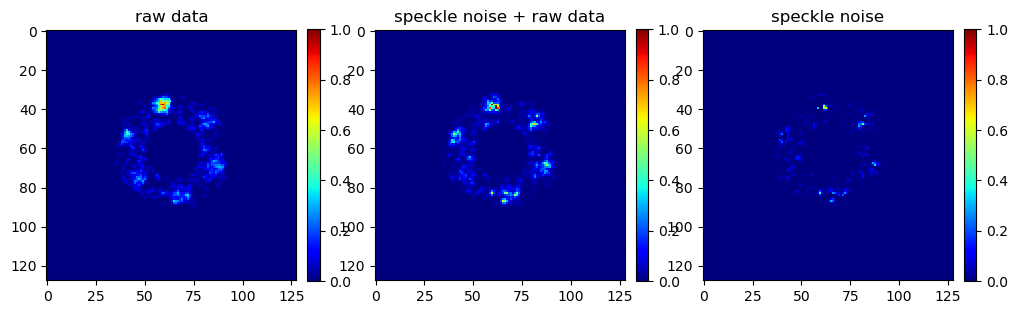

In [6]:
# speckle noise

# load training data
training_data = np.load('training_data.npz')
intensity = training_data['intensity']
phi = training_data['phi']
print(intensity.shape)

def add_speckle_noise(array, mean=0, stddev=10):
    '''adds speckled noise to data'''
    signal_w_speckle = array + array * np.random.normal(mean, stddev, array.shape)
    signal_w_speckle = np.clip(signal_w_speckle, 0, np.max(signal_w_speckle))
    signal_w_speckle = mask_and_blur_images(signal_w_speckle)
    return signal_w_speckle

def plot_speckle_noise(array, idx):
    '''plots raw, speckled+raw, and speckled noise data'''
    mask_raw = mask_and_blur_images(array) # masks the raw data    
    add_speckle = add_speckle_noise(mask_raw) # adds masked, speckled noise to masked, raw data
    max_int = np.max(add_speckle[idx])
    
    #normalize
    norm_raw = normalize_intensity(mask_raw) # normalizes masked, raw data
    norm_speckle = normalize_intensity(add_speckle) # normalize masked, raw+gaussian data
    max_int = np.max(norm_raw[idx])


    fig, axs = plt.subplots(1, 3, figsize=(12,6))
    
    im0 = axs[0].imshow(norm_raw[idx], cmap='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[0].set_title('raw data')
    fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

    im1 = axs[1].imshow(norm_speckle[idx], cmap ='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[1].set_title('speckle noise + raw data')
    fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

    noise = norm_speckle[idx]-norm_raw[idx]
    im2 = axs[2].imshow(noise, cmap ='jet', interpolation='nearest', vmin=0, vmax=max_int)
    axs[2].set_title("speckle noise")
    fig.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)
    return plt.show()

plot_speckle_noise(intensity, 5)
